In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

fileurl = ('https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv')
df = pd.read_csv(fileurl, delimiter=',', index_col='Customer Id')

In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


Unnamed: 0           0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [3]:
df.drop(columns='Unnamed: 0', inplace = True)
df['Defaulted'].fillna((df['Defaulted'].max()), inplace=True)
df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

# Segmentos de clientes

In [4]:
scaler = StandardScaler()
# Transformar data
df_escalado = scaler.fit_transform(df)
#Instancia de Kmeans


In [11]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_escalado)
  silhouette_scores.append(silhouette_score(df_escalado, kmeans.labels_))

Text(0, 0.5, 'Curva')

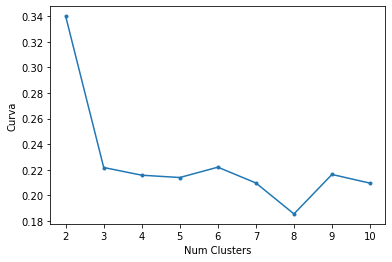

In [13]:
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Num Clusters')
plt.ylabel('Curva')

In [ ]:
# R = 2 valor de curva más alta

In [14]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_escalado)
df['cluster_kmeans'] = kmeans.labels_

# Dendograma

Text(0.5, 0, 'Puntos')

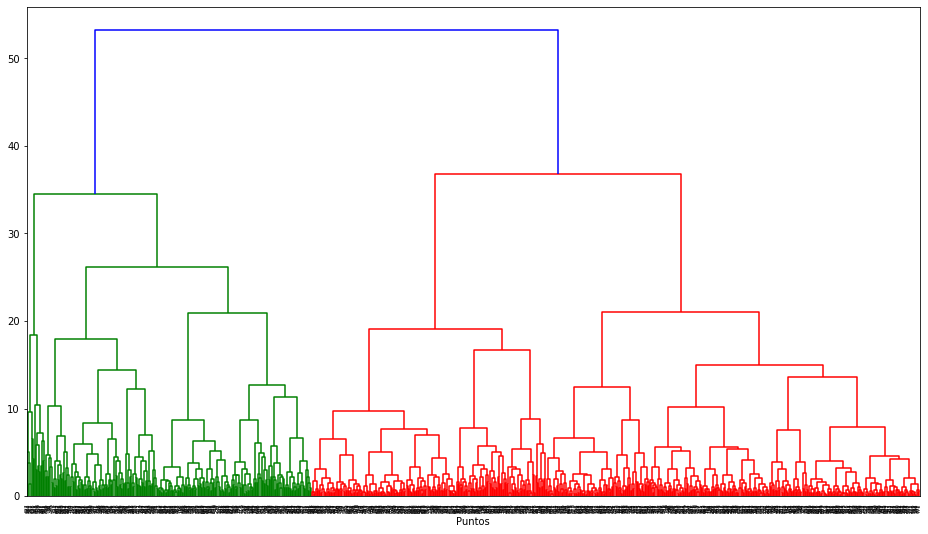

In [16]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,9))
sch.dendrogram(sch.linkage(df_escalado, method='ward'))
plt.xlabel('Puntos')

In [17]:
# el espacio con mayores cortes es el color rojo
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(df_escalado)
df['cluster_hc']=hc.labels_
dbs = DBSCAN(eps=0.5, min_samples=5).fit(df_escalado)
# Guardamos etiquetas de cluster en df
df['cluster_dbs'] = dbs.labels_

# Qué algoritmo es mejor y por qué

In [18]:
silhouette_score(df_escalado, df['cluster_kmeans'])

0.3350400668707611

In [20]:
silhouette_score(df_escalado, df['cluster_hc'])

0.18399298871127845

In [21]:
silhouette_score(df_escalado, df['cluster_dbs'])

-0.2649750771707322

Conclusión
Para este dataset, y utilizando un número de clusters óptimo de 2, el resultado de silueta mejor acertado es para KMEANS.